# Who Wants Shots?
<center> <img src="./Images/myriam-zilles-Ep941iDLwhk-unsplash.jpg" alt="Sick Stuffy" width="800"/> </center>
<center> Photo by <a href="https://unsplash.com/@myriamzilles?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Myriam Zilles</a> on <a href="https://unsplash.com/collections/IUPhDJeZav4/flu-vaccination-social?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a> </center>
  
### Not that kind! 

Utilizing data courtesy of the United States National Center for Health Statistics, I hope to be able to predict whether or not a given citizen will choose to be vaccinated based on existing behavioral patterns from past survey results. 

Stakeholder: Research firm on behalf of the Office of Infectious Diseases (subdivision of the US Department of Health and Human Services).

Business Problem: Utilizing predictive modeling to detect patterns in employment, enviromental, and behavioral factors, I aim to accurately predict whether or not a citizen will get vaccinated. Doing so will assist with the goal of guiding public health efforts through coordination with local outreach programs to encourage vaccination among the general population, with a focus on targeted behaviors, geographical areas, or patterns identified.

Null Hypothesis: Predicting if a citizen will get vaccinated based on behaviors and underlying patterns from survey data will be no more accurate than a 50/50 guess. (H0 accuracy = 50%)

Alt Hypothesis: Predicting if a citizen will get vaccinated based on behaviors and underlying patterns from survey data will exceed accuracy of random guessing. (HA accuracy > 50%)

Target Metric(s) - Accuracy %, AUC, Precision and/or F1.
False Positive -> Precision Score -> Predicts Vaccinated, Citizen was Un-vaccinated. **Target**
False Negative -> Recall Score -> Predicts Un-vaccinated, Citizen was vaccinated. 

## Data Understanding
Here we have a dataset provided by the US National Center for Health Statistics. The merged dataframe consists of 26,707 survey responses to 37 questions. Some questions were not answered by the respondents. 

Columns represent the questions asked in the survey, while rows represent the survey respondents. 

Survey questions/column headers are as follows:
 * h1n1_concern - Level of concern about the H1N1 flu. 
     * Ranked from 0 (not at all concerned) to 3 (very concerned).
 * h1n1_knowledge - Level of knowledge about H1N1 flu. 
     * Ranked from 0 (no knowledge) to 2 (a lot of knowledge).
 * behavioral_antiviral_meds - Has respondent taken antiviral medication? Yes/No (binary)
 * behavioral_avoidance - Has respondent avoided close contact with others with flu-like symptoms? Yes/No (binary)
 * behavioral_face_mask - Has respondent bought a face mask? Yes/No (binary)
 * behavioral_wash_hands - Has respondent frequently washed hands or used hand sanitizer? Yes/No (binary)
 * behavioral_large_gatherings - Has respondent reduced time at large gatherings? Yes/No (binary)
 * behavioral_outside_home - Has respondent reduced contact with people outside of own household? Yes/No (binary)
 * behavioral_touch_face - Has respondent avoided touching face(including eyes, nose, mouth, etc)? Yes/No (binary)
 * doctor_recc_h1n1 - Was H1N1 flu vaccine recommended by doctor? Yes/No (binary)
 * doctor_recc_seasonal - Was Seasonal flu vaccine recommended by doctor? Yes/No (binary)
 * chronic_med_condition - Does respondent have chronic medical condition? Yes/No (binary) Conditions include: asthma or other lung condition, diabetes, heart condition, kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. 
 * child_under_6_months - Does respondent have regular close contact with a child under the age of six months? Yes/No (binary)
 * health_worker - Is respondent a healthcare worker? Yes/No (binary)
 * health_insurance - Does respondent have health insurance? Yes/No (binary)
 * opinion_h1n1_vacc_effective - Respondent's personal opinion about H1N1 vaccine effectiveness
     * Ranked from 1 (not at all effective) to 5 (very effective).
 * opinion_h1n1_risk - Respondent's personal opinion about risk of getting sick with H1N1 flu without vaccine 
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine 
     * Ranked from 1 (not at all worried) to 5 (very worried)
 * opinion_seas_vacc_effective - Respondent's personal opinion about seasonal flu vaccine effectiveness 
     * Ranked from 1 (not at all effective) to 5 (very effective)
 * opinion_seas_risk - Respondent's personal opinion about risk of getting sick with seasonal flu without vaccine 
     * Ranked from 1 (very low) to 5 (very high)
 * opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine 
     * Ranked from 1 (not at all worried) to 5 (very worried).
 * age_group - Age group of respondent - Ranges are 18-34, 35-44, 45-54, 55-64, and 65+ Years.
 * education - Self-reported education level. Less than 12 years, 12 years, Some College, or College Graduate.
 * race - Race of respondent. White, Black, Hispanic, and Other/Multiple.
 * sex - Sex of respondent. Male or Female 
 * income_poverty - Respondent annual household income with respect to 2008 Census poverty thresholds.
     * "Below Poverty", "<= \\$75,000 Above Poverty" , or "> \\$75,000"
 * marital_status - Marital status of respondent.
     * Married or Not Married
 * rent_or_own - Housing situation of respondent.
     * Rent or Own
 * employment_status - Employment status of respondent.
     * Employed, Not in Labor Force, or Unemployed
 * hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
 * census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
 * household_adults - Number of OTHER adults in household, responses range 0 through 3.
 * household_children - Number of children in household, responses range 0 to 3.
 * employment_industry - Industry respondent is employed in. Values are represented as random, encoded character strings.
 * employment_occupation - Occupation of respondent. Values are represented as random, encoded character strings.
 
 
 
Target Variable - H1N1 or Seasonal Flu Vaccine 


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
labels = pd.read_csv('Data/training_set_labels.csv')
labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [3]:
features = pd.read_csv('Data/training_set_features.csv')
features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [4]:
#merge labels and features together in one DF
df = pd.merge(features,labels, on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
df.dropna(subset=['health_insurance'],inplace=True)

In [6]:
#figure out what's goin on in here... looks like I've got some objects and nulls to deal with.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                14433 non-null  int64  
 1   h1n1_concern                 14383 non-null  float64
 2   h1n1_knowledge               14359 non-null  float64
 3   behavioral_antiviral_meds    14386 non-null  float64
 4   behavioral_avoidance         14329 non-null  float64
 5   behavioral_face_mask         14422 non-null  float64
 6   behavioral_wash_hands        14415 non-null  float64
 7   behavioral_large_gatherings  14380 non-null  float64
 8   behavioral_outside_home      14384 non-null  float64
 9   behavioral_touch_face        14364 non-null  float64
 10  doctor_recc_h1n1             14069 non-null  float64
 11  doctor_recc_seasonal         14069 non-null  float64
 12  chronic_med_condition        14300 non-null  float64
 13  child_under_6_mo

In [7]:
df.isna().sum()

respondent_id                     0
h1n1_concern                     50
h1n1_knowledge                   74
behavioral_antiviral_meds        47
behavioral_avoidance            104
behavioral_face_mask             11
behavioral_wash_hands            18
behavioral_large_gatherings      53
behavioral_outside_home          49
behavioral_touch_face            69
doctor_recc_h1n1                364
doctor_recc_seasonal            364
chronic_med_condition           133
child_under_6_months              2
health_worker                    10
health_insurance                  0
opinion_h1n1_vacc_effective      45
opinion_h1n1_risk                28
opinion_h1n1_sick_from_vacc      10
opinion_seas_vacc_effective      30
opinion_seas_risk                23
opinion_seas_sick_from_vacc       5
age_group                         0
education                        96
race                              0
sex                               0
income_poverty                 1741
marital_status              

## H1N1 Target Modeling - Data Preparation

In [8]:
#drop seasonal flu vaccine columns from h1n1 dataframe.
h1_df = df.drop(columns=['opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
                 'seasonal_vaccine', 'doctor_recc_seasonal'], axis= 1)
h1_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1


In [9]:
h1_df.h1n1_vaccine.value_counts(normalize=True)

0    0.702764
1    0.297236
Name: h1n1_vaccine, dtype: float64

In [10]:
y = h1_df['h1n1_vaccine']
X = h1_df.drop('h1n1_vaccine', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

In [11]:
#Imputing "Unknown" into object columns for missing values on columns where survey was not answered
cat_cols = ['age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa','employment_industry', 'employment_occupation']
cat_imp = SimpleImputer(strategy="constant", fill_value="Unknown")
cat_imp.fit(X_train[cat_cols])
X_train_cats = pd.DataFrame(cat_imp.transform(X_train[cat_cols]), columns = X_train[cat_cols].columns)
X_train_cats

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
1,18 - 34 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,wxleyezf,emcorrxb
2,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,Unknown,Unknown
3,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,Non-MSA,Unknown,Unknown
4,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
10819,45 - 54 Years,College Graduate,White,Female,Below Poverty,Not Married,Rent,Unemployed,bhuqouqj,"MSA, Not Principle City",Unknown,Unknown
10820,65+ Years,College Graduate,White,Female,"> $75,000",Married,Rent,Not in Labor Force,kbazzjca,"MSA, Not Principle City",Unknown,Unknown
10821,18 - 34 Years,Some College,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",Unknown,Unknown
10822,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,mlyzmhmf,Non-MSA,cfqqtusy,rcertsgn


In [12]:
#confirming correction worked
X_train_cats.isna().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [13]:
#Imputing median value on numerical columns where survey response was not recorded.
num_cols = ['respondent_id','h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc','household_adults',
       'household_children']
num_imp = SimpleImputer(strategy='median')
num_imp.fit(X_train[num_cols])
X_train_nums = pd.DataFrame(num_imp.transform(X_train[num_cols]), columns = X_train[num_cols].columns)
X_train_nums

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
0,20765.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5.0,1.0,0.0,0.0
1,12835.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,1.0,1.0
2,16627.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,1.0,0.0
3,17524.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,0.0,0.0
4,23014.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10819,15877.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,1.0,0.0
10820,4547.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,1.0,1.0,0.0
10821,7454.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,5.0,0.0,3.0
10822,11928.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0,1.0


In [14]:
#combining imputed columns back into X_train with no missing values
X_train = pd.concat([X_train_nums, X_train_cats], axis=1)
X_train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,20765.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
1,12835.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,wxleyezf,emcorrxb
2,16627.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,Unknown,Unknown
3,17524.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,bhuqouqj,Non-MSA,Unknown,Unknown
4,23014.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10819,15877.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Unemployed,bhuqouqj,"MSA, Not Principle City",Unknown,Unknown
10820,4547.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Rent,Not in Labor Force,kbazzjca,"MSA, Not Principle City",Unknown,Unknown
10821,7454.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",Unknown,Unknown
10822,11928.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,mlyzmhmf,Non-MSA,cfqqtusy,rcertsgn


In [15]:
#Imputing the "unknown" values for the object columns on the test set
X_test_cats = pd.DataFrame(cat_imp.transform(X_test[cat_cols]), columns = X_test[cat_cols].columns)

In [16]:
#Imputing the median values for the number columns on the test set
X_test_nums = pd.DataFrame(num_imp.transform(X_test[num_cols]), columns = X_test[num_cols].columns)

In [17]:
#Combining the imputed columns back into X_test
X_test = pd.concat([X_test_nums, X_test_cats], axis=1)
X_test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,17023.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",xqicxuve,mxkfnird
1,21290.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",wxleyezf,emcorrxb
2,26231.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",wxleyezf,dlvbwzss
3,14639.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,haliazsg
4,5221.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,kbazzjca,"MSA, Principle City",vjjrobsf,oijqvulv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,16402.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,Non-MSA,arjwrbjb,mxkfnird
3605,21457.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",atmlpfrs,vlluhbov
3606,26667.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,White,Male,Unknown,Not Married,Rent,Unemployed,dqpwygqj,"MSA, Not Principle City",Unknown,Unknown
3607,8254.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Black,Male,"<= $75,000, Above Poverty",Married,Own,Unemployed,lzgpxyit,Non-MSA,Unknown,Unknown


In [18]:
#Dummying out the "object" columns on the train data
ohe = OneHotEncoder(sparse=False)
X_train_dum = X_train.select_dtypes('object')
dums = ohe.fit_transform(X_train_dum)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_dum.index)
dums_df.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x1_Unknown,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#combined the dummy columns back into the X_Train number columns for a complete, clean DF ready for modeling.
X_train_clean = pd.concat([X_train_nums, dums_df], axis=1)
X_train_clean.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,20765.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12835.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16627.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17524.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23014.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#Dummy out object column on cleaned test df
X_test_dum = X_test.select_dtypes('object')

X_test_dums = ohe.transform(X_test_dum)
X_test_dums_df = pd.DataFrame(X_test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_dum.index)
X_test_dums_df.head()

,x0_18 - 34 Years,x0_35 - 44 Years,x0_45 - 54 Years,x0_55 - 64 Years,x0_65+ Years,x1_12 Years,x1_< 12 Years,x1_College Graduate,x1_Some College,x1_Unknown,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#combine dummy columns with numerical clean columns on test set for clean df ready for modeling
X_test_clean = pd.concat([X_test_nums, X_test_dums_df], axis=1)
X_test_clean.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
0,17023.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21290.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26231.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14639.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5221.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#setting index - respondent id is irrelevant for modeling and could throw off scaling. 
X_train_clean.set_index(keys='respondent_id', inplace=True)
X_train_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
20765.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12835.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16627.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17524.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23014.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#setting index - respondent id is irrelevant for modeling and could throw off scaling. 
X_test_clean.set_index(keys='respondent_id', inplace=True)
X_test_clean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,x11_qxajmpny,x11_rcertsgn,x11_tfqavkke,x11_ukymxvdu,x11_uqqtjvyb,x11_vlluhbov,x11_xgwztkwe,x11_xqwwgdyp,x11_xtkaffoo,x11_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
17023.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21290.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26231.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14639.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5221.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y_train.value_counts()

0    7618
1    3206
Name: h1n1_vaccine, dtype: int64

In [31]:
y_test.value_counts(normalize=True)

0    0.69964
1    0.30036
Name: h1n1_vaccine, dtype: float64

In [34]:
X_test_clean.isna().sum().sum()

0

In [140]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10824 entries, 20765.0 to 18923.0
Columns: 108 entries, h1n1_concern to x11_xzmlyyjv
dtypes: float64(108)
memory usage: 9.0 MB


### H1N1 Modeling - Modeling


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Logistic Regression

In [35]:
lr_base = LogisticRegression(random_state=88)
lr_base.fit(X_train_clean, y_train)

LogisticRegression(random_state=88)

In [40]:
cv_lr = cross_val_score(lr_base, X_train_clean, y_train, cv=5)
cv_lr

array([0.81247113, 0.81570439, 0.82448037, 0.82355658, 0.81561922])

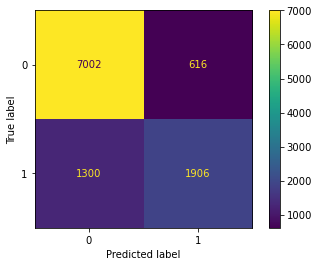

In [42]:
plot_confusion_matrix(lr_base, X_train_clean, y_train)

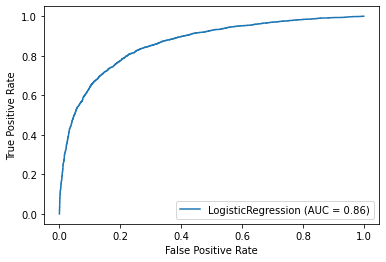

In [38]:
plot_roc_curve(lr_base, X_train_clean, y_train)

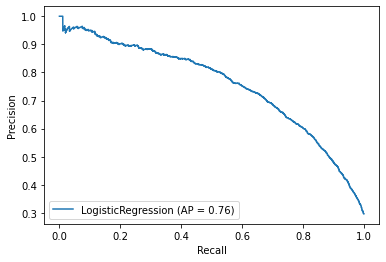

In [39]:
plot_precision_recall_curve(lr_base, X_train_clean, y_train)

In [43]:
lr_2 = LogisticRegression(class_weight='balanced', random_state=88)
lr_2.fit(X_train_clean, y_train)

LogisticRegression(class_weight='balanced', random_state=88)

In [44]:
bal_cv_lr = cross_val_score(lr_2, X_train_clean, y_train)
bal_cv_lr

array([0.78429561, 0.79584296, 0.80230947, 0.79769053, 0.76848429])

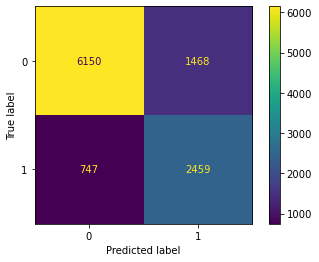

In [45]:
plot_confusion_matrix(lr_2, X_train_clean, y_train)

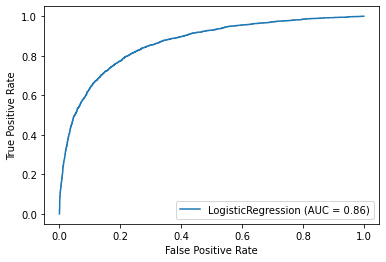

In [46]:
plot_roc_curve(lr_2, X_train_clean, y_train)

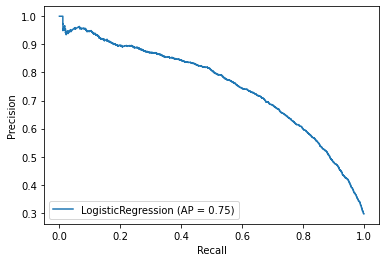

In [47]:
plot_precision_recall_curve(lr_2, X_train_clean, y_train)

In [49]:
sm_lr = SMOTE(sampling_strategy=0.65, random_state=88)

In [50]:
X_train_sm, y_train_sm = sm_lr.fit_resample(X_train_clean, y_train)

In [52]:
y_train_sm.value_counts(normalize=True)

0    0.606094
1    0.393906
Name: h1n1_vaccine, dtype: float64

In [53]:
lr3 = lr_base.fit(X_train_sm, y_train_sm)

In [54]:
sm_cv = cross_val_score(lr3, X_train_sm, y_train_sm)
sm_cv

array([0.78719173, 0.8035004 , 0.79713604, 0.81026253, 0.8085953 ])

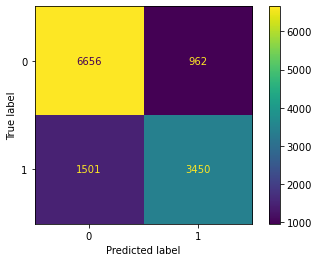

In [55]:
plot_confusion_matrix(lr3, X_train_sm, y_train_sm)

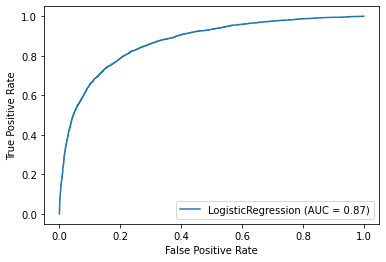

In [56]:
plot_roc_curve(lr3, X_train_sm, y_train_sm)

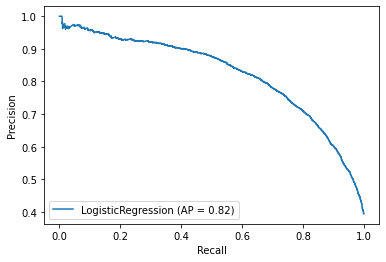

In [57]:
plot_precision_recall_curve(lr3, X_train_sm, y_train_sm)

## Decision Trees 

In [62]:
dt_base = DecisionTreeClassifier(random_state=88)
dt_base.fit(X_train_clean, y_train)

DecisionTreeClassifier(random_state=88)

In [63]:
dtcv_base = cross_val_score(dt_base, X_train_clean, y_train)
dtcv_base

array([0.7334873 , 0.73856813, 0.72840647, 0.73487298, 0.73382625])

In [66]:
dt_base.score(X_train_clean, y_train)

1.0

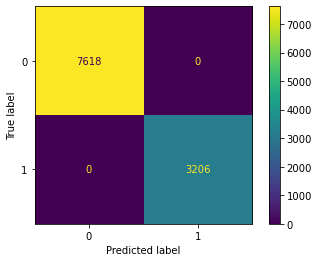

In [64]:
plot_confusion_matrix(dt_base, X_train_clean, y_train)

In [67]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf' : [1, 5, 10, 25]
}

In [68]:
dt_sm = dt_base.fit(X_train_sm, y_train_sm)

In [69]:
dtcv_sm = cross_val_score(dt_sm, X_train_sm, y_train_sm)
dtcv_sm

array([0.71718377, 0.716786  , 0.72633254, 0.83333333, 0.83804218])

In [71]:
dt_gs = GridSearchCV(dt_sm, tree_params, cv=5)

In [72]:
dt_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=88),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 5, 10, 25]})

In [73]:
dt_gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

In [74]:
dt_gs.best_score_

0.8066715292096056

## Random Forests 

In [75]:
rf_base = RandomForestClassifier(random_state=88)
rf_base.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=88)

In [76]:
rf_cv = cross_val_score(rf_base, X_train_clean, y_train, cv=5)
rf_cv

array([0.81986143, 0.81293303, 0.82632794, 0.81570439, 0.81654344])

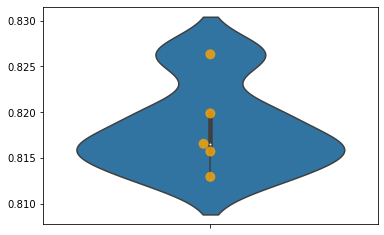

In [87]:
import seaborn as sns
#Base Random Forest model - no tuning
sns.violinplot(y=rf_cv, bw=.4)
sns.swarmplot(y=rf_cv, color='orange', size=10, alpha=0.8);

In [88]:
#Fitting with SMOTE balanced data
rf_sm = rf_base.fit(X_train_sm, y_train_sm)

In [89]:
rf_sm_cv = cross_val_score(rf_base, X_train_sm, y_train_sm)
rf_sm_cv

array([0.78599841, 0.79793158, 0.7875895 , 0.90135243, 0.93434142])

In [164]:
rf_sm_cv.mean()

0.8414426683710893

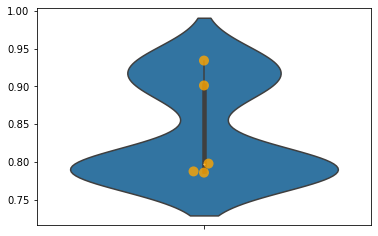

In [90]:
#Distr of SMOTE balanced data - more variance, but higher max
sns.violinplot(y=rf_sm_cv, bw=.4)
sns.swarmplot(y=rf_sm_cv, color='orange', size=10, alpha=0.8);

In [165]:
#additional validations to increase score?
rf_sm_cv2 = cross_val_score(rf_base, X_train_sm, y_train_sm, cv=10)
rf_sm_cv2

array([0.7788385 , 0.79395386, 0.79634049, 0.80031822, 0.80270485,
       0.79793158, 0.86714399, 0.95863166, 0.94749403, 0.94585987])

In [166]:
#score increased a little
rf_sm_cv2.mean()

0.8489217072293247

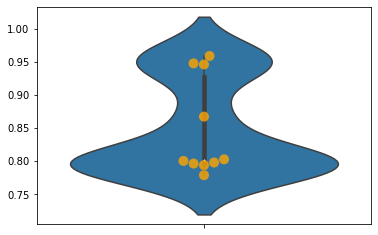

In [167]:
#Let's see distribution
sns.violinplot(y=rf_sm_cv2, bw=.4)
sns.swarmplot(y=rf_sm_cv2, color='orange', size=10, alpha=0.8);

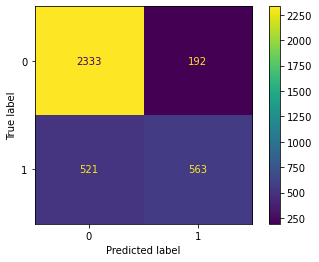

In [168]:
plot_confusion_matrix(rf_sm, X_test_clean, y_test)

In [169]:
rf_sm_preds = rf_sm.predict(X_test_clean)
#Untuned params scoring
print('Accuracy:', accuracy_score(y_test, rf_sm_preds))
print('Precision:', precision_score(y_test, rf_sm_preds))
print('Recall:', recall_score(y_test, rf_sm_preds))
print('F1 Score:', f1_score(y_test, rf_sm_preds))

Accuracy: 0.8024383485730119
Precision: 0.7456953642384105
Recall: 0.5193726937269373
F1 Score: 0.612289287656335


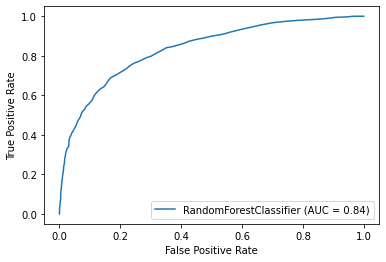

In [170]:
plot_roc_curve(rf_sm, X_test_clean, y_test)

In [91]:
#Grid search to optimize performance here - none of these params returned as high of training scores as above.
rf_tree_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5],
    'min_samples_leaf' : [1, 5, 10, 25]
}

In [92]:
rf_gs = GridSearchCV(rf_base, rf_tree_grid, cv=5)

In [93]:
rf_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=88),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5],
                         'min_samples_leaf': [1, 5, 10, 25]})

In [125]:
rf_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

In [123]:
pd.DataFrame(rf_gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.312636,0.041172,0.029341,0.011753,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703926,0.703926,0.703926,0.703464,0.703789,0.703806,0.000179,25
1,0.374743,0.069016,0.031424,0.008980,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703926,0.703926,0.703926,0.703464,0.703789,0.703806,0.000179,25
2,0.330075,0.063120,0.024780,0.005033,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703926,0.703926,0.703926,0.703464,0.703789,0.703806,0.000179,25
3,0.336803,0.061842,0.024912,0.005006,gini,1,25,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703926,0.703926,0.703926,0.703464,0.703789,0.703806,0.000179,25
4,0.413570,0.054159,0.026721,0.005532,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.709931,0.707159,0.707621,0.708545,0.709797,0.708611,0.001117,21
5,0.385159,0.032891,0.026437,0.002441,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.709931,0.707159,0.707621,0.708545,0.709797,0.708611,0.001117,21
6,0.404488,0.051633,0.027729,0.003699,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.709931,0.707159,0.707621,0.708545,0.709335,0.708518,0.001031,24
7,0.381711,0.018416,0.026224,0.003294,gini,2,25,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.709931,0.707159,0.707621,0.708545,0.709797,0.708611,0.001117,21
8,0.479168,0.016577,0.036537,0.011389,gini,3,1,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.747806,0.736721,0.739492,0.745958,0.745379,0.743071,0.004224,9
9,0.431734,0.031125,0.025442,0.000701,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.747806,0.737644,0.739492,0.745035,0.744917,0.742979,0.003792,11


In [159]:
rf_gs.best_score_

0.7833519741476096

In [160]:
rf_2 = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=88)
rf_2.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=88)

In [161]:
rf2_cv = cross_val_score(rf_2, X_train_sm, y_train_sm, cv=10)
rf2_cv

array([0.7645187 , 0.76372315, 0.76372315, 0.77486078, 0.76292761,
       0.76929196, 0.81543357, 0.88941925, 0.88305489, 0.87340764])

In [163]:
rf2_cv.mean()

0.8060360706160153

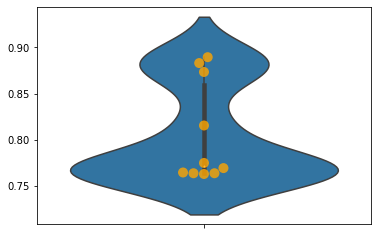

In [162]:
sns.violinplot(y=rf2_cv, bw=.4)
sns.swarmplot(y=rf2_cv, color='orange', size=10, alpha=0.8);

In [172]:
#Tuned params scoring -worse!
rf_sm2_preds = rf_2.predict(X_test_clean)

print('Accuracy:', accuracy_score(y_test, rf_sm2_preds))
print('Precision:', precision_score(y_test, rf_sm2_preds))
print('Recall:', recall_score(y_test, rf_sm2_preds))
print('F1 Score:', f1_score(y_test, rf_sm2_preds))

Accuracy: 0.7949570518149072
Precision: 0.7662538699690402
Recall: 0.4566420664206642
F1 Score: 0.5722543352601156


### AdaBoost and GradientBoost

In [102]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [103]:
#AdaBoost base for comparison
abc = AdaBoostClassifier(random_state=88)

abc.fit(X_train_clean, y_train)

AdaBoostClassifier(random_state=88)

In [105]:
abc_cv = cross_val_score(abc, X_train_clean, y_train, cv=5)
abc_cv

array([0.81154734, 0.81755196, 0.82817552, 0.82494226, 0.81377079])

In [108]:
abc_cv.mean()

0.8191975769787367

In [112]:
#Trying with SMOTE evened out data for comparison to base and to Gradient Boost
abc_sm = abc.fit(X_train_sm, y_train_sm)

In [114]:
#cross validate SMOTE train data
abc_sm_cv = cross_val_score(abc_sm, X_train_sm, y_train_sm, cv=5)
abc_sm_cv

array([0.78281623, 0.79793158, 0.78918059, 0.86435959, 0.87544767])

In [115]:
#average training score 
abc_sm_cv.mean()

0.8219471318752669

In [104]:
#GBoost base model to compare 
gbc = GradientBoostingClassifier(random_state=88)

gbc.fit(X_train_clean, y_train)

GradientBoostingClassifier(random_state=88)

In [106]:
#cross validate
gbc_cv = cross_val_score(gbc, X_train_clean, y_train, cv=5)
gbc_cv

array([0.82124711, 0.82540416, 0.82909931, 0.81847575, 0.81377079])

In [107]:
#average training score
gbc_cv.mean()

0.8215994245537944

In [109]:
#Trying with SMOTE evened data for comparison
gbc_sm = gbc.fit(X_train_sm, y_train_sm)

In [158]:
#Untuned params scoring
print('Accuracy:', accuracy_score(y_test, gbc_sm.predict(X_test_clean)))
print('Precision:', precision_score(y_test, gbc_sm.predict(X_test_clean)))
print('Recall:', recall_score(y_test, gbc_sm.predict(X_test_clean)))
print('F1 Score:', f1_score(y_test, gbc_sm.predict(X_test_clean)))

Accuracy: 0.8101967303962316
Precision: 0.7338804220398594
Recall: 0.577490774907749
F1 Score: 0.6463603510583377


In [110]:
#cross validate on SMOTE training data
gbc_sm_cv = cross_val_score(gbc_sm, X_train_sm, y_train_sm)
gbc_sm_cv

array([0.78480509, 0.79872713, 0.79236277, 0.89459029, 0.90847593])

In [111]:
#average cross validated score - improved over imbalanced class data and over either
#AdaBoost model - will proceed with SMOTE data and GB over AdaBoost.
gbc_sm_cv.mean()

0.8357922415214947

In [116]:
#additional validations - improved scores?
gbc_sm_2 = gbc.fit(X_train_sm, y_train_sm)

In [117]:
gbc_sm_cv_2 = cross_val_score(gbc_sm_2, X_train_sm, y_train_sm, cv=10)
gbc_sm_cv_2

array([0.78440732, 0.78838504, 0.79315831, 0.80827367, 0.79077168,
       0.79952267, 0.85759745, 0.94669849, 0.92442323, 0.91640127])

In [118]:
#minor improvement - GridSearchCV next for optimal parameter search
gbc_sm_cv_2.mean()

0.8409639141824888

In [137]:
gbc_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200]
}

In [138]:
gbc_sm_gs = GridSearchCV(gbc, gbc_grid, cv=10)

In [139]:
# gbc_sm_gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=88),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [141]:
# gbc_sm_gs.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [142]:
#gbc_sm_gs.best_score_
#ran secondary check for max depths below - max depth returns same score
#Optimal params per this GSCV {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}

0.8431122655802664

In [143]:
#checking alternate depths
gbc_grid2 = {
    'learning_rate': [0.5],
    'n_estimators': [50],
    'max_depth': [1,3,5]
}

In [144]:
gbc_sm_gs2 = GridSearchCV(gbc, gbc_grid2, cv=10)

In [145]:
# gbc_sm_gs2.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=88),
             param_grid={'learning_rate': [0.5], 'max_depth': [1, 3, 5],
                         'n_estimators': [50]})

In [146]:
#gbc_sm_gs2.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}

In [147]:
#score is exactly the same - best params {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
#gbc_sm_gs2.best_score_

0.8431122655802664

In [148]:
gb_final = GradientBoostingClassifier(learning_rate=0.5,max_depth=3,n_estimators=50, random_state=88)
gb_final.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=50, random_state=88)

In [149]:
gb_final_cv = cross_val_score(gb_final, X_train_sm, y_train_sm, cv=10)
gb_final_cv

array([0.78520286, 0.79315831, 0.79077168, 0.80429594, 0.78838504,
       0.80190931, 0.85998409, 0.95147176, 0.93476531, 0.92117834])

In [151]:
gb_final_cv.mean()

0.8431122655802664

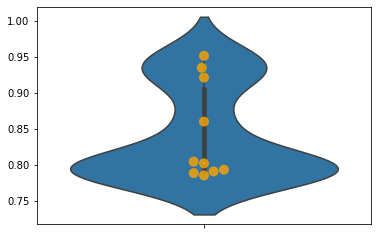

In [150]:
sns.violinplot(y=gb_final_cv, bw=.4)
sns.swarmplot(y=gb_final_cv, color='orange', size=10, alpha=0.8);

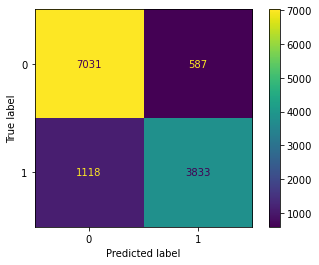

In [153]:
plot_confusion_matrix(gb_final, X_train_sm, y_train_sm)

In [154]:
gb_preds = gb_final.predict(X_test_clean)
print('Accuracy:', accuracy_score(y_test, gb_preds))
print('Precision:', precision_score(y_test, gb_preds))
print('Recall:', recall_score(y_test, gb_preds))
print('F1 Score:', f1_score(y_test, gb_preds))

Accuracy: 0.8082571349404267
Precision: 0.7273781902552204
Recall: 0.5784132841328413
F1 Score: 0.644398766700925
